# Rankeamento dos dados segundo parâmetros calculados e diagrama de rosetas:



# Montando o ambiente para leitura dos dados


In [1]:
#Montando Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = 'gdrive/My Drive/CCD/'

In [0]:
# Importa bibliotecas para serem usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Ler os metadados que contém todas as cidades e seus parâmetros calculados
weibull = pd.read_csv(path + 'weibulldatabase.csv').drop(columns = 'Unnamed: 0')

In [5]:
weibull.head()

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1,shape,scale,vmp,vmaxE,p_vmp,p_vmaxE,w_mean,w_median,mean,median
0,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,1.318052,2.083909,0.708654,4.198345,0.352587,0.063755,1.919424,1.578024,1.917687,1.466667
1,82704,-72.666667,-7.633333,170.00,Cruzeiro do Sul,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,1.595945,0.972541,0.524622,1.617950,0.781968,0.233510,0.872160,0.772985,0.865837,0.766667
2,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,1.819613,1.366514,0.881577,2.053984,0.592554,0.227919,1.214608,1.117216,1.209139,1.000000
3,82807,-70.766667,-8.166667,190.00,Tarauacá,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,1.574234,0.698074,0.367861,1.175210,1.083896,0.314065,0.626846,0.553081,0.619974,0.342960
4,83098,-36.166667,-10.150000,56.13,Coruripe,Alagoas,AL,America/Maceio,-3,America/Maceio,-3,1.317313,1.629811,0.553156,3.285630,0.450845,0.081378,1.501331,1.233970,1.481009,1.000000


In [6]:
# Rankeia os valores a partir da Velocidade mais provável

weibull.sort_values(by = ['vmp'], ascending = False).head(10)

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1,shape,scale,vmp,vmaxE,p_vmp,p_vmaxE,w_mean,w_median,mean,median
283,82594,-36.766667,-5.116667,3.43,Macau,Rio Grande do Norte,RN,America/Fortaleza,-3,America/Fortaleza,-3,4.172969,6.008760,5.626949,6.599864,0.263616,0.213068,5.459560,5.503522,5.467067,5.433333
6,82988,-37.733333,-9.116667,635.00,Mata Grande,Alagoas,AL,America/Maceio,-3,America/Maceio,-3,5.449892,5.130730,4.943392,5.433631,0.397849,0.349452,4.734234,4.797028,4.747225,4.666667
63,82777,-40.383333,-7.000000,583.50,Campos Sales,Ceará,CE,America/Fortaleza,-3,America/Fortaleza,-3,2.831476,5.164689,4.428124,6.237404,0.216605,0.140611,4.600881,4.537619,4.613291,4.664333
285,82598,-35.200000,-5.916667,48.60,Natal,Rio Grande do Norte,RN,America/Fortaleza,-3,America/Fortaleza,-3,3.130196,4.789517,4.235375,5.608384,0.254669,0.177629,4.285230,4.260302,4.304131,4.333333
61,82491,-37.766667,-4.566667,13.00,Aracati,Ceará,CE,America/Fortaleza,-3,America/Fortaleza,-3,2.643220,4.974767,4.155966,6.156642,0.212341,0.130188,4.420879,4.330647,4.422690,4.333333
43,83182,-41.866667,-11.300000,747.16,Irecê,Bahia,BA,America/Bahia,-3,America/Bahia,-3,3.096768,4.427832,3.903933,5.200749,0.272894,0.188996,3.959641,3.933606,3.970363,3.900000
281,82693,-36.583333,-6.433333,226.46,Cruzeta,Rio Grande do Norte,RN,America/Fortaleza,-3,America/Fortaleza,-3,3.137822,4.277238,3.784872,5.005087,0.285780,0.199646,3.827328,3.805710,3.831206,3.900000
208,82890,-37.083333,-8.416667,680.70,Arcoverde,Pernambuco,PE,America/Recife,-3,America/Recife,-3,4.104105,4.043447,3.777465,4.454094,0.385710,0.309691,3.670370,3.698006,3.677722,3.666667
280,82596,-35.650000,-5.650000,61.35,Ceará Mirim,Rio Grande do Norte,RN,America/Fortaleza,-3,America/Fortaleza,-3,3.561797,4.055285,3.696904,4.595796,0.337554,0.253920,3.652140,3.658743,3.659537,3.700000
344,83626,-48.550000,-20.716667,588.98,Colina,São Paulo,SP,America/Sao_Paulo,-3,America/Sao_Paulo,-3,3.143271,4.129132,3.655532,4.829425,0.296482,0.207356,3.695104,3.674675,3.703683,3.333333


In [7]:
# Rankeia os valores a partir da Velocidade mais energética

weibull.sort_values(by = ['vmaxE'], ascending = False).head(10)

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1,shape,scale,vmp,vmaxE,p_vmp,p_vmaxE,w_mean,w_median,mean,median
269,83789,-43.683333,-22.916667,63.00,Santa Cruz,Rio de Janeiro,RJ,America/Sao_Paulo,-3,America/Sao_Paulo,-3,1.764058,5.576171,3.470096,8.568785,0.142784,0.052007,4.963993,4.530061,4.953760,4.333333
253,83719,-42.033333,-22.983333,7.00,Cabo Frio (Alcalis),Rio de Janeiro,RJ,America/Sao_Paulo,-3,America/Sao_Paulo,-3,1.535946,4.547275,2.291124,7.825661,0.165018,0.045205,4.093813,3.581940,4.126468,4.000000
9,82996,-35.433333,-9.183333,50.02,Porto de Pedras,Alagoas,AL,America/Maceio,-3,America/Maceio,-3,2.069448,4.796446,3.486444,6.650163,0.182954,0.085642,4.248700,4.017937,4.245251,4.000000
283,82594,-36.766667,-5.116667,3.43,Macau,Rio Grande do Norte,RN,America/Fortaleza,-3,America/Fortaleza,-3,4.172969,6.008760,5.626949,6.599864,0.263616,0.213068,5.459560,5.503522,5.467067,5.433333
259,83114,-42.183333,-22.833333,5.57,Iguaba Grande,Rio de Janeiro,RJ,America/Sao_Paulo,-3,America/Sao_Paulo,-3,1.884527,4.483546,3.001317,6.581331,0.184314,0.075132,3.979613,3.691116,3.961391,3.400000
63,82777,-40.383333,-7.000000,583.50,Campos Sales,Ceará,CE,America/Fortaleza,-3,America/Fortaleza,-3,2.831476,5.164689,4.428124,6.237404,0.216605,0.140611,4.600881,4.537619,4.613291,4.664333
61,82491,-37.766667,-4.566667,13.00,Aracati,Ceará,CE,America/Fortaleza,-3,America/Fortaleza,-3,2.643220,4.974767,4.155966,6.156642,0.212341,0.130188,4.420879,4.330647,4.422690,4.333333
227,82287,-41.766667,-3.083333,79.50,Parnaíba,Piauí,PI,America/Fortaleza,-3,America/Fortaleza,-3,2.309616,4.644698,3.633080,6.084840,0.204462,0.109602,4.115009,3.963139,4.110005,3.950000
36,83339,-42.483333,-14.066667,882.47,Caetité,Bahia,BA,America/Bahia,-3,America/Bahia,-3,2.215455,4.536486,3.459675,6.064924,0.202973,0.103673,4.017732,3.844787,4.015652,3.841667
310,83997,-53.350000,-33.516667,24.01,Santa Vitória do Palmar,Rio Grande do Sul,RS,America/Sao_Paulo,-3,America/Sao_Paulo,-3,1.978391,4.233294,2.965573,6.026054,0.201200,0.088378,3.752459,3.517401,3.742137,3.333333


# Diagramas de Roseta

In [0]:
#Instala bibliotecas para gerar diagramas de roseta
!pip install windrose

In [0]:
from windrose import WindroseAxes # Importa classe necessária para os plots a seguir
import matplotlib.cm as cm

In [0]:
ws = np.random.random(500) * 6
wd = np.random.random(500) * 360

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

In [0]:
# Leitura dos dados com observações de vento apenas
vento = pd.read_csv(path + 'Clip/wind_only.csv').drop(columns = 'Unnamed: 0') 

In [0]:
vento.columns

Index(['date', 'id', 'wd', 'wsmax', 'ws', 'name', 'uf'], dtype='object')

In [0]:
# Selecionando as cinco cidades com 5 maiores velocidades mais prováveis:

# Macau, Mata Grande, Campos Sales, Natal, Aracati

macau = vento[vento['name'] == 'Macau'].drop(columns = ['id', 'name'])
mata_grande = vento[vento['name'] == 'Mata Grande'].drop(columns = ['id', 'name'])
campos_sales = vento[vento['name'] == 'Campos Sales'].drop(columns = ['id', 'name'])
natal = vento[vento['name'] == 'Natal'].drop(columns = ['id', 'name'])
aracati = vento[vento['name'] == 'Aracati'].drop(columns = ['id', 'name'])

# Selecionando as cinco cidades com 5 maiores velocidades mais energéticas:

# Santa Cruz, Cabo Frio (Alcalis), Porto de Pedras, Macau, Iguaba Grande

santa_cruz = vento[vento['name'] == 'Santa Cruz'].drop(columns = ['id', 'name'])
cabo_frio = vento[vento['name'] == 'Cabo Frio (Alcalis)'].drop(columns = ['id', 'name'])
porto_de_pedras = vento[vento['name'] == 'Porto de Pedras'].drop(columns = ['id', 'name'])
# Repetido: macau = vento[vento['name'] == 'Macau'].drop(columns = ['id', 'name'])
iguaba_grande = vento[vento['name'] == 'Iguaba Grande'].drop(columns = ['id', 'name'])


In [0]:
def plot_windrose(cidade, titulo):
  
  """
  Função para plotar diagramas de roseta para cada cidade
  
  Parâmetros:
  
  - cidade: dataframe para respectiva cidade contendo a velocidade do vento (ws)
  e a direção do vento (wd)
  - titulo: título para a figura
  """
  
  cidade = cidade[['ws', 'wd']].dropna()
  
  ws, wd = cidade['ws'], cidade['wd']
  
  ax = WindroseAxes.from_ax()
  
  bins = [1, 2, 3, 4, 5, 6, 7, 8, 9]
  
  ax.bar(wd, ws, normed = True, opening = 0.5, edgecolor='white', bins = bins)
  
  ax.set_title(titulo)
  
  ax.set_legend()

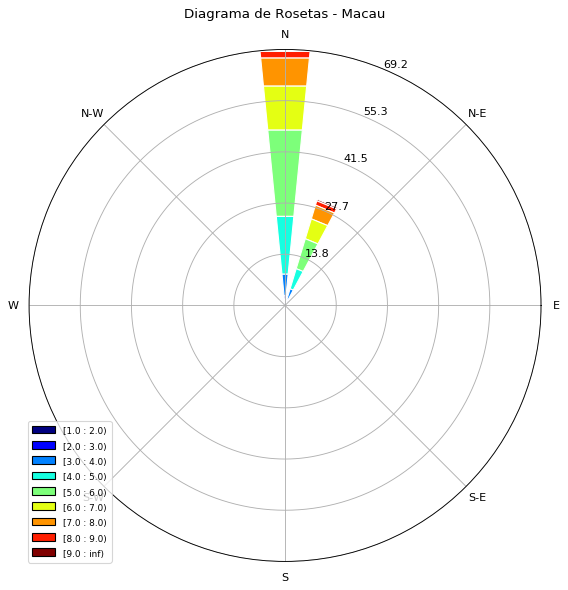

In [0]:
plot_windrose(macau, 'Diagrama de Rosetas - Macau')

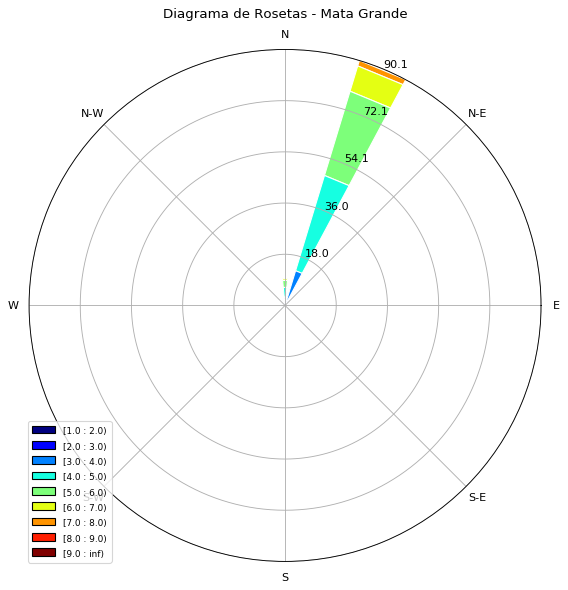

In [0]:
plot_windrose(mata_grande, 'Diagrama de Rosetas - Mata Grande')

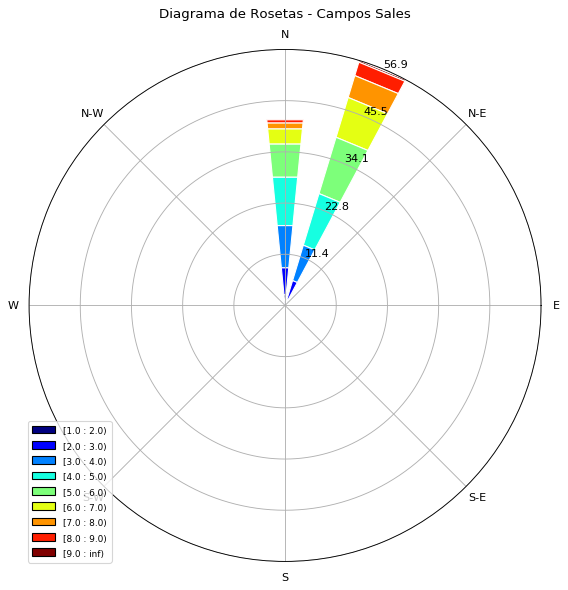

In [0]:
plot_windrose(campos_sales, 'Diagrama de Rosetas - Campos Sales')

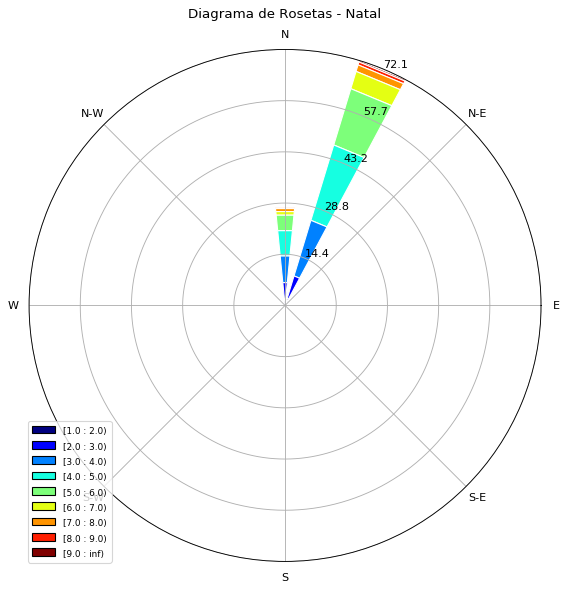

In [0]:
plot_windrose(natal, 'Diagrama de Rosetas - Natal')

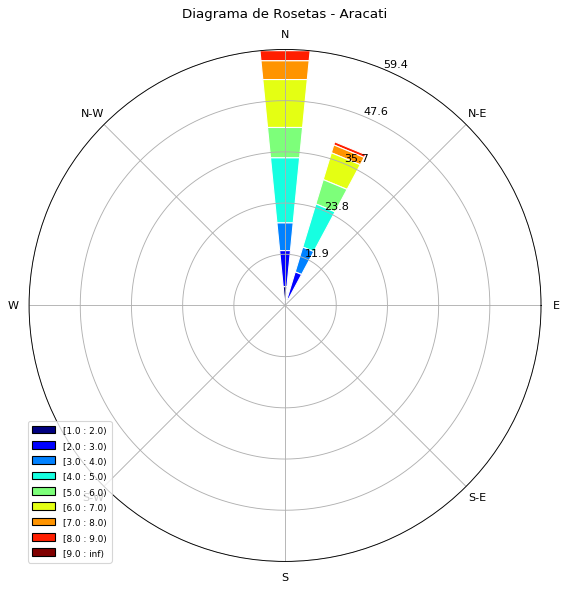

In [0]:
plot_windrose(aracati, 'Diagrama de Rosetas - Aracati')

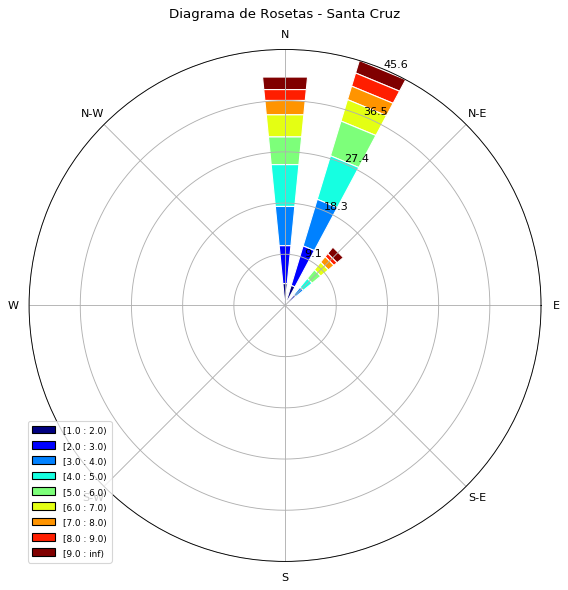

In [0]:
plot_windrose(santa_cruz, 'Diagrama de Rosetas - Santa Cruz')

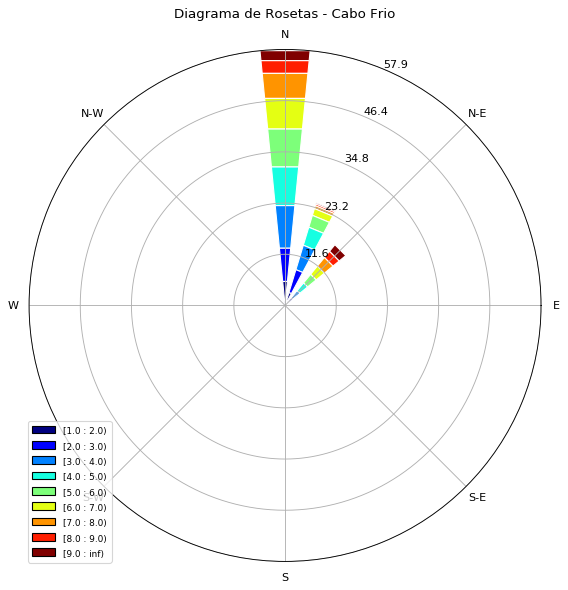

In [0]:
plot_windrose(cabo_frio, 'Diagrama de Rosetas - Cabo Frio')

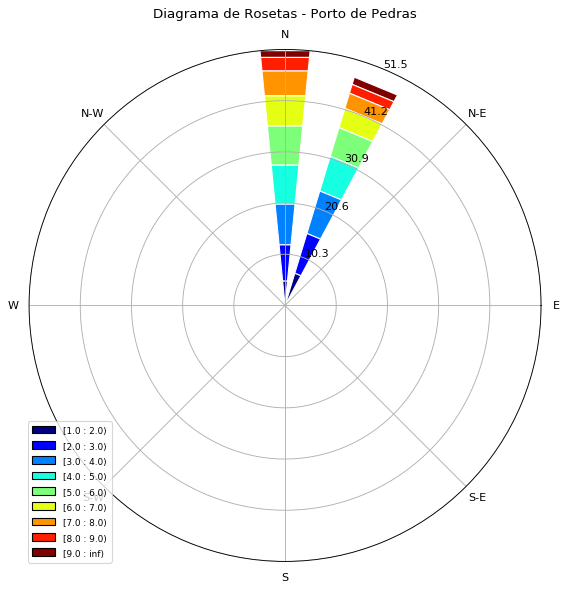

In [0]:
plot_windrose(porto_de_pedras, 'Diagrama de Rosetas - Porto de Pedras')

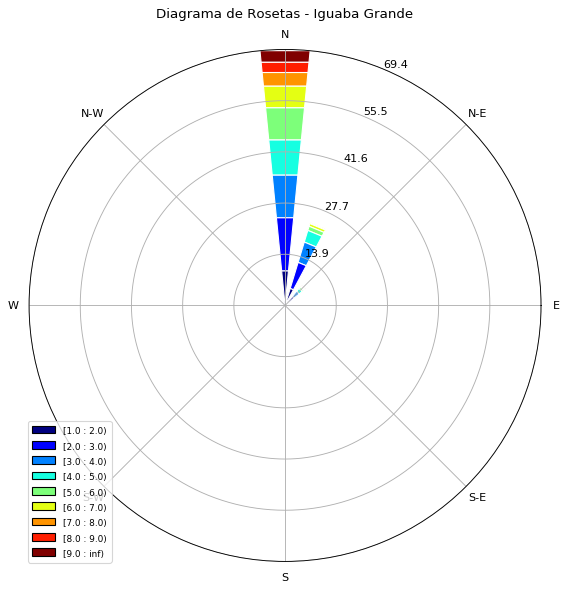

In [0]:
plot_windrose(iguaba_grande, 'Diagrama de Rosetas - Iguaba Grande')

# Distribuições de Weibull para cidades de interesse

In [0]:
from scipy.stats import exponweib
from math import ceil

In [0]:
meta = pd.read_csv(path + 'weibulldatabase.csv')

In [0]:
def plot_weibull(cidade, cidade_nome, titulo):
  
    """
  Função para plotar histograma e a distribuição de Weibull para cidade
  
  Parâmetros:
  
  - cidade: dataframe para respectiva cidade contendo a velocidade do vento (ws)
  - cidade_nome: string do nome da cidade tal qual aparece no dataframe principal
  - titulo: título para a figura
  """

  fig, ax = plt.subplots(1, 1, figsize = (8, 8))

  params = meta[meta['name'] == cidade_nome]
  
  temp2 = cidade['ws'].dropna()
  temp2 = temp2[temp2 != 0]
  
  # Plota histograma dos dados de velocidade de vento
  ax.hist(temp2, bins = np.linspace(0, ceil(temp2.max()), ceil(temp2.max())),
          density = True, color = (0.0,0.8,0.5))

  # Plota a distribuição de Weibull para esses dados
  ax.plot(temp2.sort_values(),
          stats.exponweib.pdf(temp2.sort_values(), *stats.exponweib.fit(temp2.sort_values(), 1, params['shape'], scale= params['scale'], loc=0)),
          'k-')

  ax.set_title(titulo)

  ax.set_ylabel('Densidade')

  ax.set_xlabel('Velocidade do Vento (m/s)')

  ax.grid()

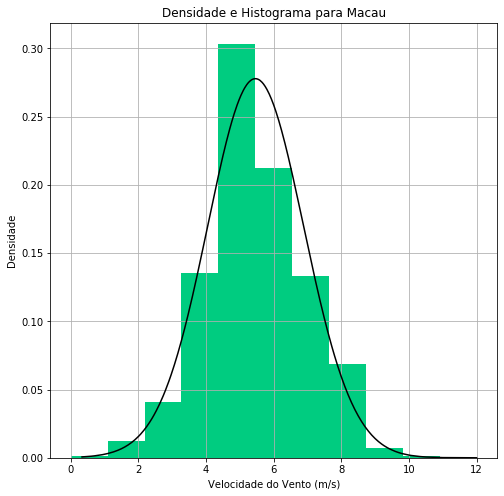

In [0]:
plot_weibull(macau, 'Macau', 'Densidade e Histograma para Macau')

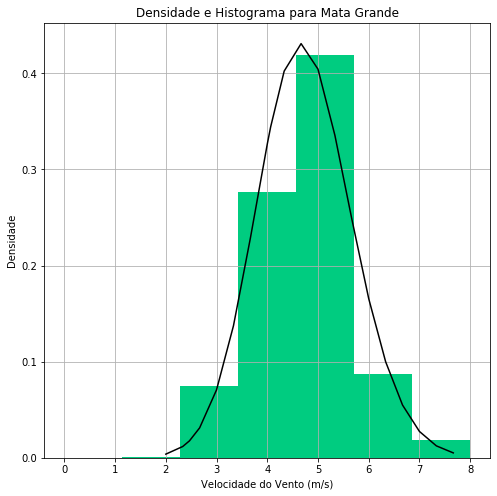

In [0]:
plot_weibull(mata_grande, 'Mata Grande', 'Densidade e Histograma para Mata Grande')

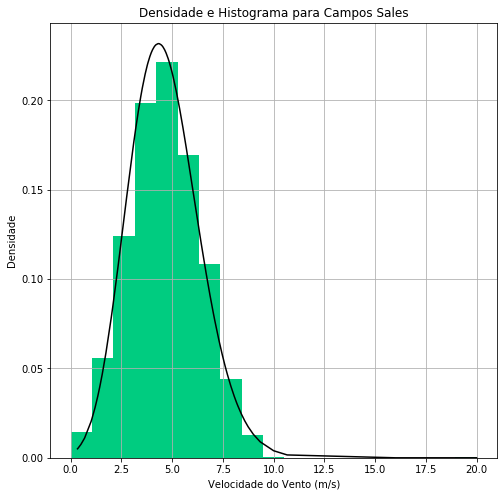

In [0]:
plot_weibull(campos_sales, 'Campos Sales', 'Densidade e Histograma para Campos Sales')

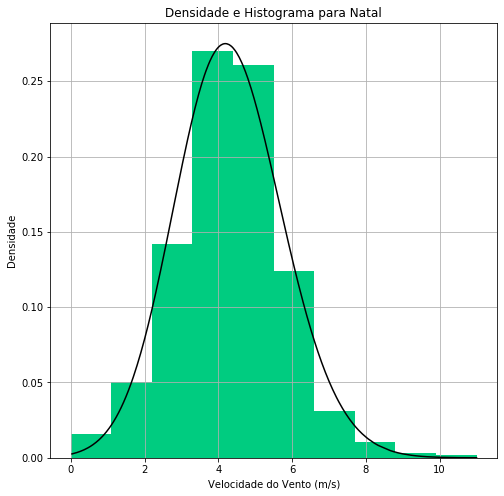

In [0]:
plot_weibull(natal, 'Natal', 'Densidade e Histograma para Natal')

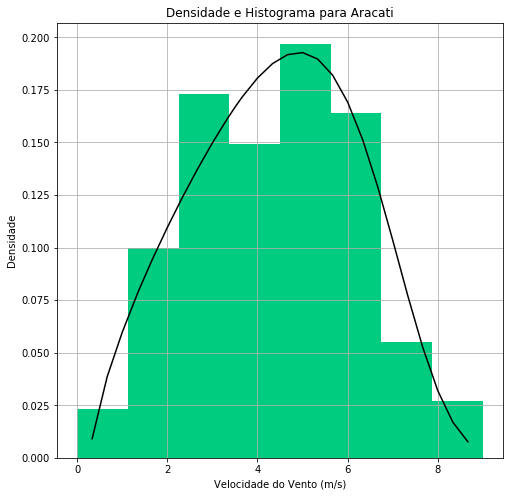

In [0]:
plot_weibull(aracati, 'Aracati', 'Densidade e Histograma para Aracati')

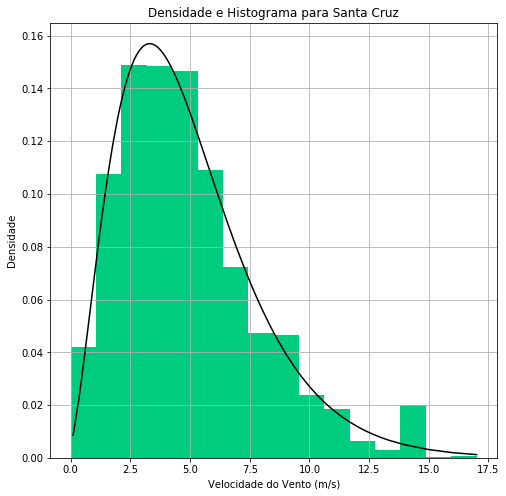

In [0]:
plot_weibull(santa_cruz, 'Santa Cruz', 'Densidade e Histograma para Santa Cruz')

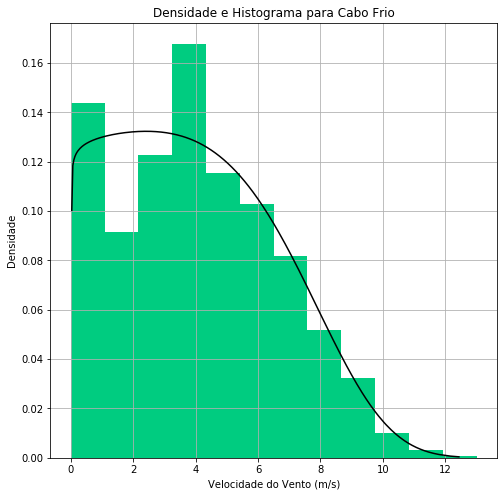

In [0]:
plot_weibull(cabo_frio, 'Cabo Frio (Alcalis)', 'Densidade e Histograma para Cabo Frio')

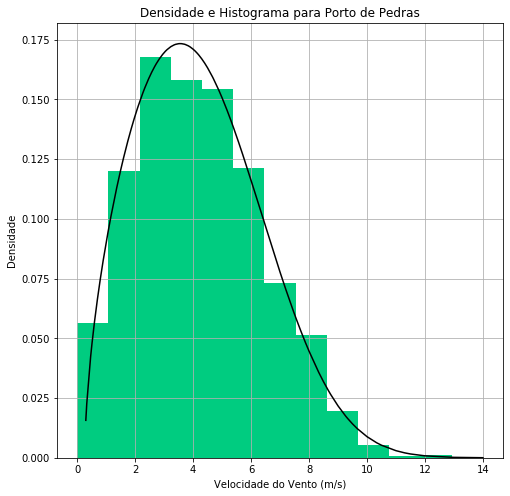

In [0]:
plot_weibull(porto_de_pedras, 'Porto de Pedras', 'Densidade e Histograma para Porto de Pedras')

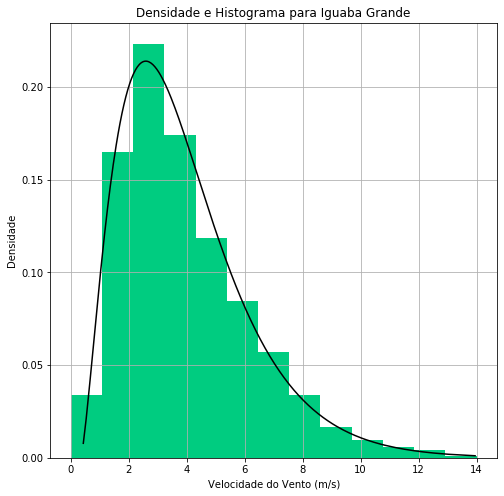

In [0]:
plot_weibull(iguaba_grande, 'Iguaba Grande', 'Densidade e Histograma para Iguaba Grande')